In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


df = pd.read_csv("Books Data Report.csv")
#Step 1: Importing All Necessary Libraries & Loading Our Dataset

In [21]:
df.describe()
#Step 2: Getting The Summary of Our Dataset

Book ID  Average Rating       Isbn 13     Num_Pages  Rating Count  \
count  11117.00000    11117.000000  1.111700e+04  11117.000000  1.111700e+04   
mean   21314.98111        3.934002  9.759158e+12    336.417649  1.793621e+04   
std    13093.50662        0.350545  4.430637e+11    241.192389  1.125202e+05   
min        1.00000        0.000000  8.987060e+09      0.000000  0.000000e+00   
25%    10289.00000        3.770000  9.780000e+12    192.000000  1.040000e+02   
50%    20316.00000        3.960000  9.780000e+12    299.000000  7.450000e+02   
75%    32105.00000        4.130000  9.780000e+12    416.000000  4.996000e+03   
max    45641.00000        5.000000  9.790000e+12   6576.000000  4.597666e+06   

       Text_Reviews_Count  
count        11117.000000  
mean           541.688855  
std           2576.732986  
min              0.000000  
25%              9.000000  
50%             47.000000  
75%            238.000000  
max          94265.000000

In [23]:
df.isna().sum()
#Step 3: Checking for Empty Values In Our Dataset 

Book ID               0
Title                 0
Authors               0
Average Rating        0
Isbn                  0
Isbn 13               0
Language Code         0
Num_Pages             0
Rating Count          0
Text_Reviews_Count    0
Publication_Date      0
Publisher             0
dtype: int64

In [24]:
df.duplicated().sum()
#Step 4: Checking for Total Number of Duplicate Values In Our Dataset

0

In [25]:
df.nunique()
#Step 5: Checking for Unique Values In Each Column of Our Dataset

Book ID               11117
Title                 10344
Authors                6634
Average Rating          209
Isbn                  11117
Isbn 13                  23
Language Code            27
Num_Pages               997
Rating Count           5291
Text_Reviews_Count     1821
Publication_Date       3678
Publisher              2289
dtype: int64

In [26]:
df.rename(columns = {"Book ID": "Book_ID", "Average Rating": "Average_Rating", "Rating Count": "Rating_Count"}, inplace = True)
#Step 6: Renaming Selected Column Heaaders In Our Dataset

In [27]:
authors_book_count = df["Authors"].value_counts()
df["Books_By_Authors"] = df["Authors"].map(authors_book_count)
#Step 7: Generating Additional Column From Existing Column In Our Dataset

In [28]:
publisher_counts = df["Publisher"].value_counts()
df["Books_Published"] = df["Publisher"].map(publisher_counts)
#Step 7: Generating Additional Column From Existing Column In Our Dataset

In [29]:
def classify_rating (rating):
    if rating < 2 :
        return "Low"
    
    elif 2 <= rating < 3:
        return "Medium"
    
    elif 3 <= rating < 4:
        return "Average"
    
    else:
        return "High"
    
    df["Rating_Level"] = df['Average_Rating'].apply(classify_rating)
#Step 7: Generating Additional Column From Existing Column In Our Dataset

In [31]:
drop_column = ["Book_ID", "Title", "Isbn", "Isbn 13"]
df.drop(columns = drop_column, inplace = True)
#Step 8: Removing Unwanted Column In Our Dataset. 

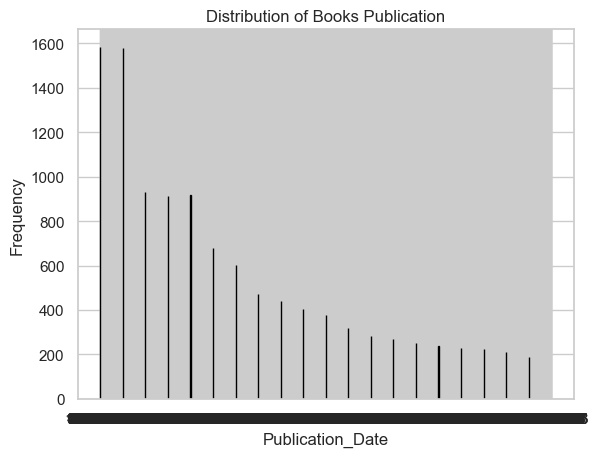

In [56]:
plt.hist(df["Publication_Date"], bins = 20, width = 0.7, color = 'skyblue', edgecolor =  'black')
plt.xlabel("Publication_Date")
plt.ylabel("Frequency")
plt.title("Distribution of Books Publication")
plt.show()
#Step 9: Creating Visuals Using Matplotlib Library

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11117 entries, 0 to 11116
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Authors             11117 non-null  object 
 1   Average_Rating      11117 non-null  float64
 2   Language Code       11117 non-null  object 
 3   Num_Pages           11117 non-null  int64  
 4   Rating_Count        11117 non-null  int64  
 5   Text_Reviews_Count  11117 non-null  int64  
 6   Publication_Date    11117 non-null  object 
 7   Publisher           11117 non-null  object 
 8   Books_By_Authors    11117 non-null  int64  
 9   Books_Published     11117 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 868.6+ KB


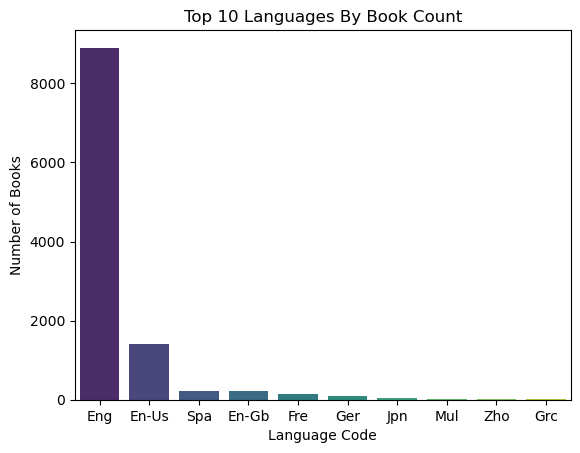

In [ ]:
top_langs = df["Language Code"].value_counts().head(10)
sns.barplot(x = top_langs.index, y = top_langs.values, palette = 'viridis')
plt.title("Top 10 Languages By Book Count")
plt.xlabel("Language Code")
plt.ylabel("Number of Books")
plt.show()
#Step 10: Creating Visuals Using Seaborn Library

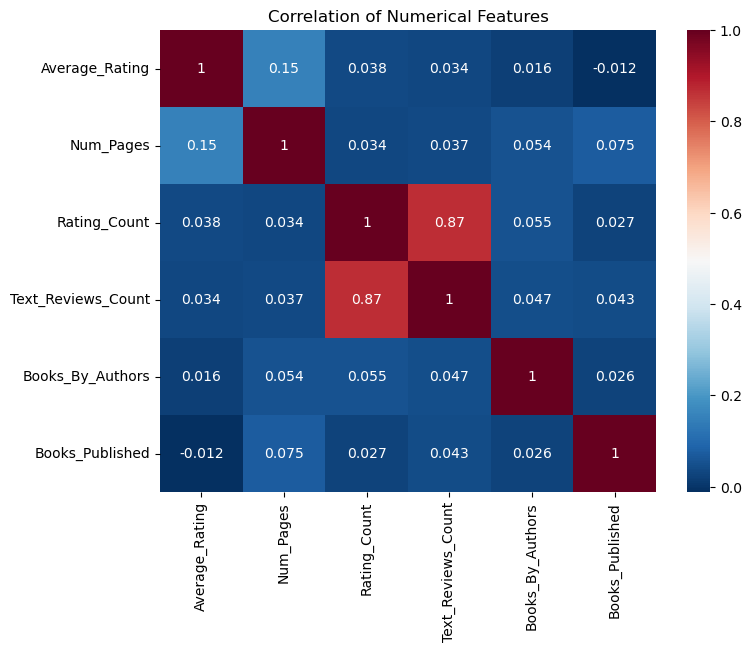

In [40]:
plt.figure(figsize = (8,6))
sns.heatmap(df.select_dtypes(include = ['float', 'int']).corr(), annot = True, cmap = 'RdBu_r')
plt.title("Correlation of Numerical Features")
plt.show()

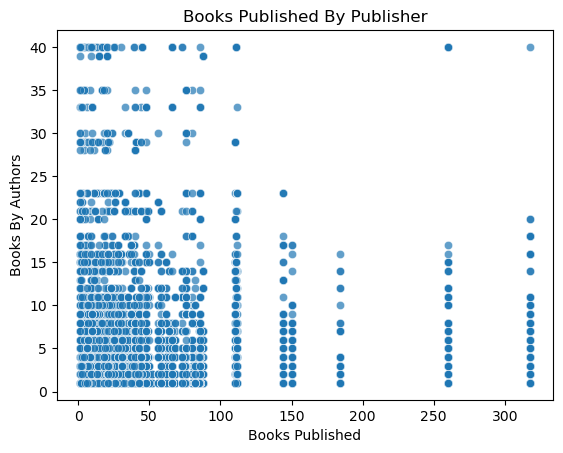

In [42]:
sns.scatterplot(x = "Books_Published", y = "Books_By_Authors", data = df, alpha = 0.7)
plt.title("Books Published By Publisher")
plt.xlabel("Books Published")
plt.ylabel("Books By Authors")
plt.show()

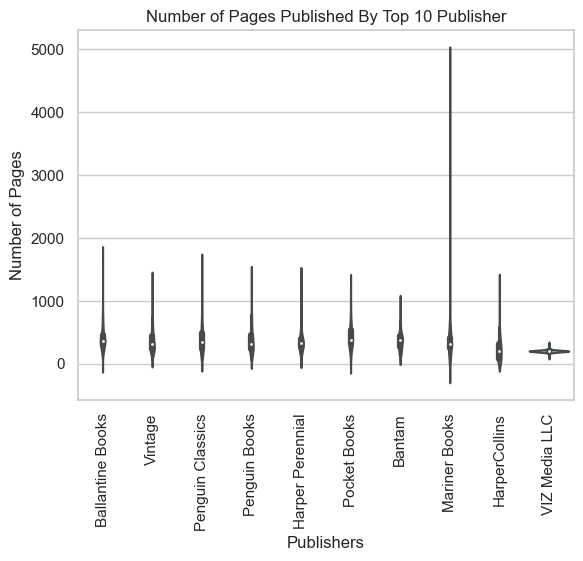

In [54]:
top_publishers = df["Publisher"].value_counts().nlargest(10).index
sns.violinplot(data = df[df["Publisher"].isin(top_publishers)], x = "Publisher", y = "Num_Pages")
sns.set(style = "whitegrid")
plt.xlabel("Publishers")
plt.ylabel("Number of Pages")
plt.xticks(rotation = 90)
plt.title("Number of Pages Published By Top 10 Publisher")
plt.show()